<a href="https://colab.research.google.com/github/priyasjsu/Machine-learning-models/blob/main/Predict_Brest_Cancer_using_sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform Prediction on Brest Cancer dataset using Decision tree, Random forest, AdaBoost, Gaussian Model and compare their performance and did some EDA to analyse the dataset. Also perfrom the Feature Imporatnce using Random forest and feature reduction using PCA.
### The provided dataset contains 569 data instances. Each data instance has 30 features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image. (UCI Dataset). Each instance is classified into "malignant" or "Benign".

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Importing the data from csv
data = pd.read_csv('data2.csv')
#print. top 10 rows data to explore
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Data Exploration 

In [ ]:
# checking the shape of data
print("Shape of data", data.shape) 

print("Dimention of data", data.ndim)

Shape of data (569, 31)
Dimention of data 2


In [ ]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Checking the data types
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Text(0.5, 0, 'Target Variable')

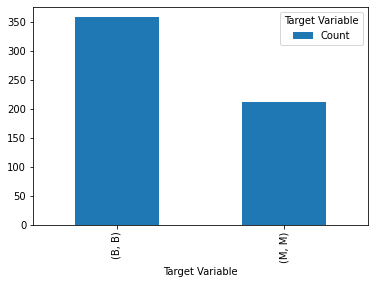

In [ ]:
import matplotlib.pyplot as plt

# Check the target variable data distribution 

# Plot distribution of points by Diagnosis 
data.groupby('diagnosis')['diagnosis'].apply(pd.value_counts).plot(kind='bar')

# Add legend to plot
plt.legend(['Count'], title='Target Variable')

# Add x-axis label
plt.xlabel("Target Variable") 

In [ ]:
# Distribution of all feature 

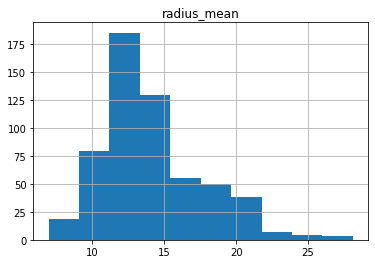

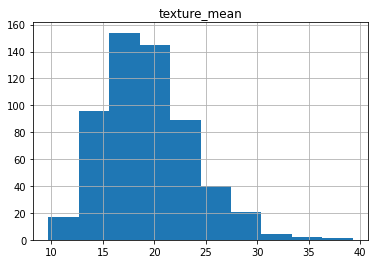

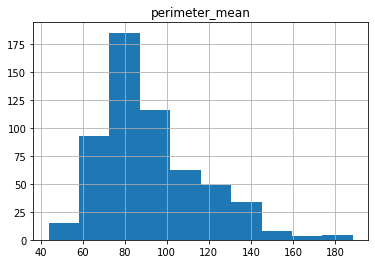

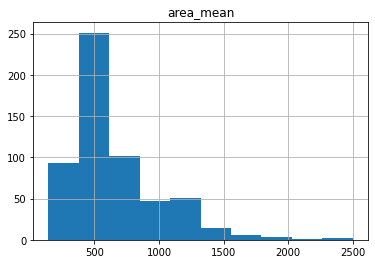

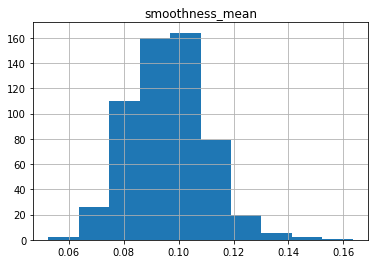

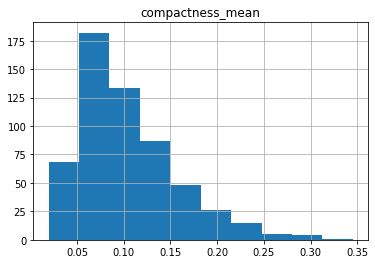

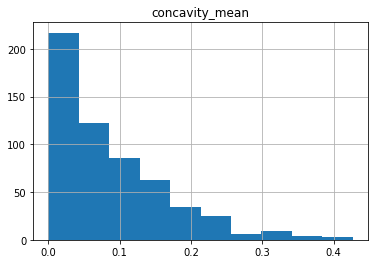

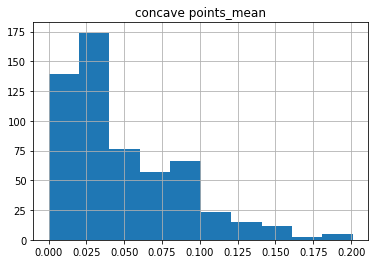

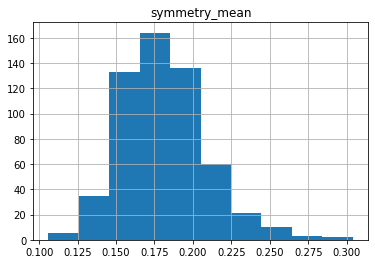

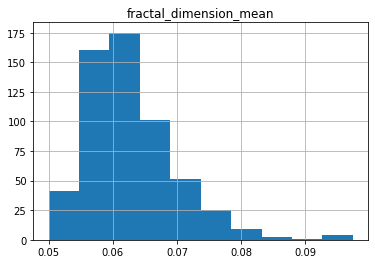

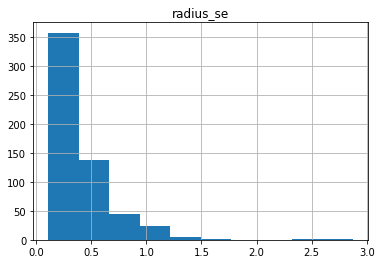

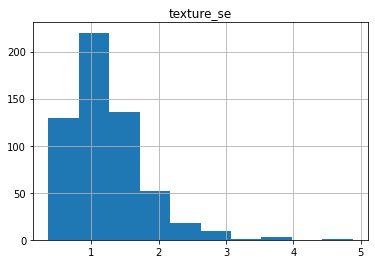

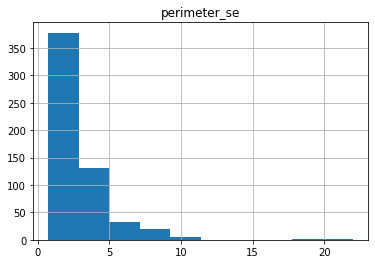

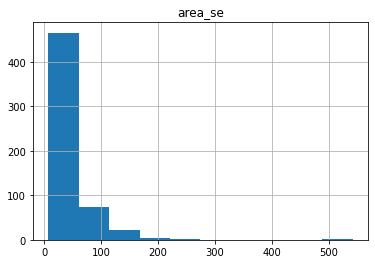

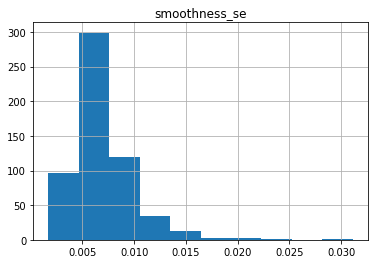

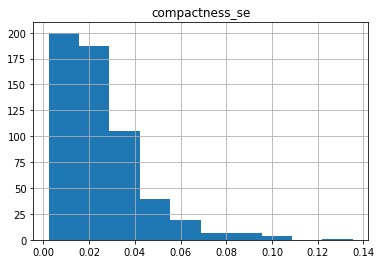

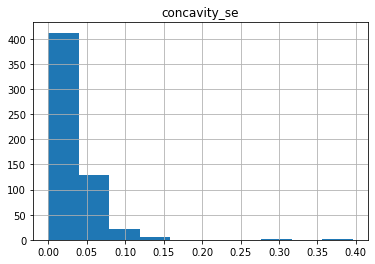

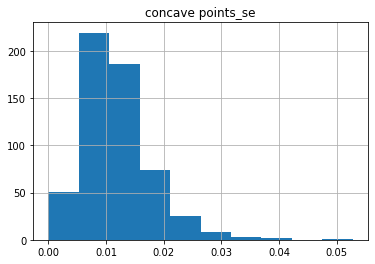

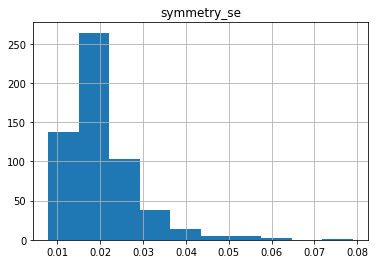

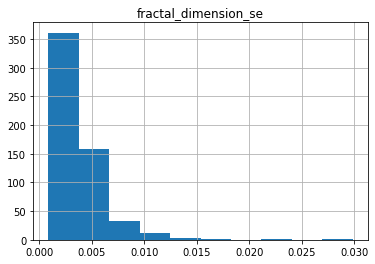

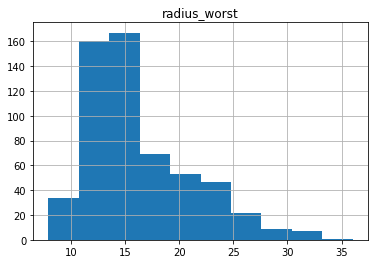

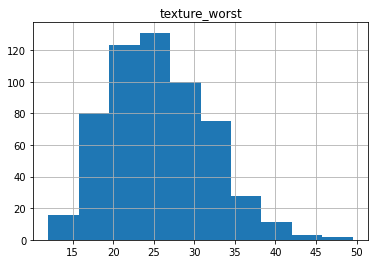

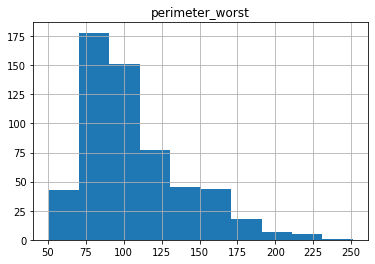

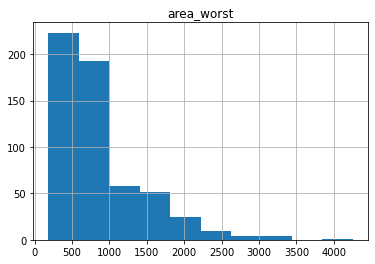

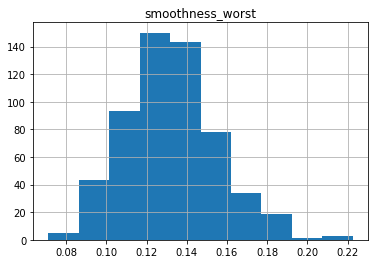

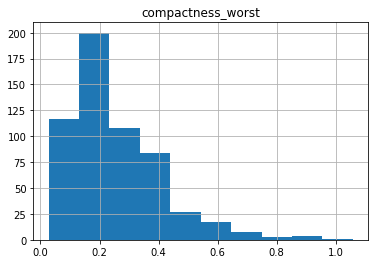

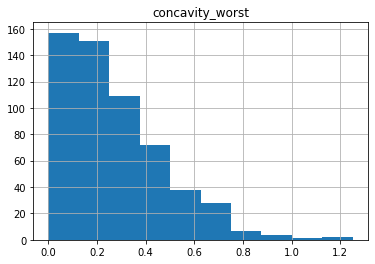

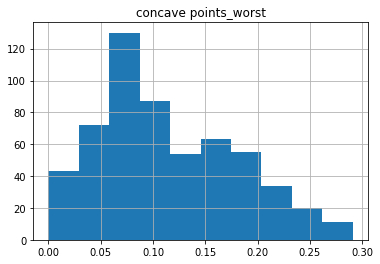

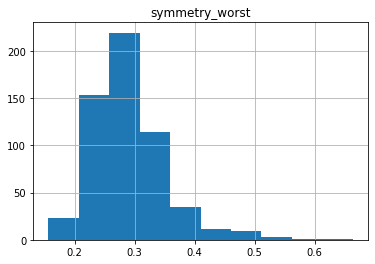

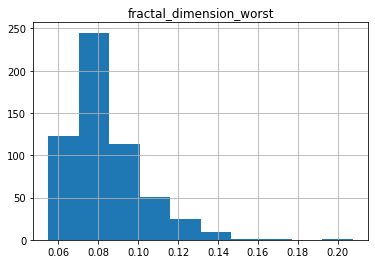

In [ ]:
for i in data.columns[1:]:
    data[i].hist()
    plt.title(i, size=12)
    plt.show()

### Skewness of probability dirtribution of feature values

skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. 
In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 
The skewness value can be positive or negative, or even undefined. 
If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [ ]:
# Check the skew value 
for i in data.columns[1:]:
    sk = data[i].skew()
    print("Skew value for {0} is ,".format(i), sk)
    print("\n")

Skew value for radius_mean is , 0.9423795716730992


Skew value for texture_mean is , 0.6504495420828159


Skew value for perimeter_mean is , 0.9906504253930081


Skew value for area_mean is , 1.6457321756240424


Skew value for smoothness_mean is , 0.45632376481955844


Skew value for compactness_mean is , 1.1901230311980404


Skew value for concavity_mean is , 1.4011797389486722


Skew value for concave points_mean is , 1.1711800812336282


Skew value for symmetry_mean is , 0.7256089733641999


Skew value for fractal_dimension_mean is , 1.3044888125755076


Skew value for radius_se is , 3.0886121663847574


Skew value for texture_se is , 1.646443808753053


Skew value for perimeter_se is , 3.443615202194899


Skew value for area_se is , 5.447186284898394


Skew value for smoothness_se is , 2.314450056636759


Skew value for compactness_se is , 1.9022207096378565


Skew value for concavity_se is , 5.110463049043661


Skew value for concave points_se is , 1.4446781446974786


Skew valu

### Kurtosis of probability dirtribution of feature values

#### Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

In [ ]:
# Check the kurtosis value 
for i in data.columns[1:]:
    sk = data[i].kurtosis()
    print("kurtosis value for {0} is ,".format(i), sk)
    print("\n")

kurtosis value for radius_mean is , 0.8455216229065377


kurtosis value for texture_mean is , 0.7583189723727752


kurtosis value for perimeter_mean is , 0.9722135477110654


kurtosis value for area_mean is , 3.6523027623507582


kurtosis value for smoothness_mean is , 0.8559749303632245


kurtosis value for compactness_mean is , 1.650130467219256


kurtosis value for concavity_mean is , 1.9986375291042124


kurtosis value for concave points_mean is , 1.066555702965477


kurtosis value for symmetry_mean is , 1.2879329922294565


kurtosis value for fractal_dimension_mean is , 3.0058921201694933


kurtosis value for radius_se is , 17.686725966164644


kurtosis value for texture_se is , 5.349168692469973


kurtosis value for perimeter_se is , 21.40190492588045


kurtosis value for area_se is , 49.20907650724119


kurtosis value for smoothness_se is , 10.469839532360393


kurtosis value for compactness_se is , 5.10625248342338


kurtosis value for concavity_se is , 48.8613953017919


kurto

### Statistics of data

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
### Correlation of features value

In [ ]:
cormat = data.corr()
round(cormat,2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


<AxesSubplot:>

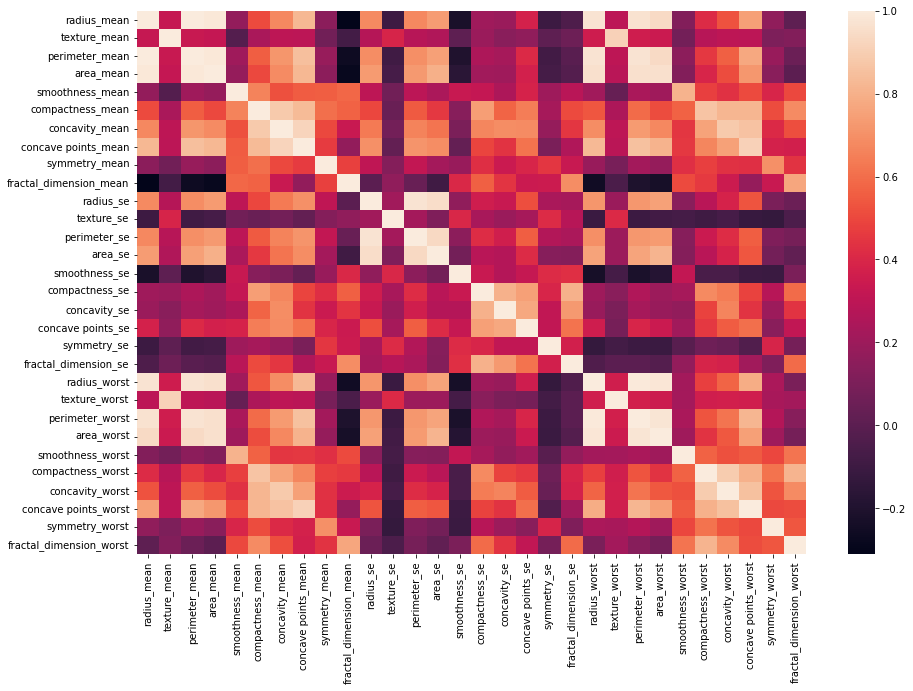

In [ ]:
import seaborn as sns

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))

#create seaborn heatmap
sns.heatmap(cormat)


#### listing the features whose correlation value is more than .8 or is almost linear

In [ ]:
highly_corr_features = []
# iterate over the correlation matrix and identify highly correlated feature pairs
for i in range(len(cormat.columns)):
    for j in range(i):
        if abs(cormat.iloc[i, j]) > 0.8:
            feature_pair = (cormat.columns[i], cormat.columns[j])
            highly_corr_features.append(feature_pair)
            print('feature_pair', feature_pair, cormat.iloc[i, j])
            print('\n')


feature_pair ('perimeter_mean', 'radius_mean') 0.9978552814938109


feature_pair ('area_mean', 'radius_mean') 0.9873571700566127


feature_pair ('area_mean', 'perimeter_mean') 0.9865068039913907


feature_pair ('concavity_mean', 'compactness_mean') 0.8831206701772507


feature_pair ('concave points_mean', 'radius_mean') 0.8225285223871786


feature_pair ('concave points_mean', 'perimeter_mean') 0.8509770412528191


feature_pair ('concave points_mean', 'area_mean') 0.8232688686524342


feature_pair ('concave points_mean', 'compactness_mean') 0.831135043133698


feature_pair ('concave points_mean', 'concavity_mean') 0.9213910263788588


feature_pair ('perimeter_se', 'radius_se') 0.9727936770160764


feature_pair ('area_se', 'area_mean') 0.8000859212343201


feature_pair ('area_se', 'radius_se') 0.951830112110991


feature_pair ('area_se', 'perimeter_se') 0.9376554069544157


feature_pair ('concavity_se', 'compactness_se') 0.8012683427383291


feature_pair ('fractal_dimension_se', 'compac

### Descriptive Features and Target Variable

In [ ]:
df = data;

# Split data into features and target variable
X=df.iloc[:,1:]
y= df.iloc[:,0]

In [ ]:
X.shape, y.shape

((569, 30), (569,))

### Encoding the Target Variable as target variable value in string format 'M' and 'B'

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y_encoded= encoder.transform(y)


### Data Normalisation

In [ ]:
# Normalizing the value using min max scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)


## 1. (a) Use “from sklearn.tree import DecisionTreeClassifier”.

In [ ]:
from sklearn.model_selection import train_test_split


# Split data into training and testing sets as given in requirement 70% for training and 30 % for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, train_size= 0.7, test_size=0.3, random_state=42)


## Train a DT classifier with Entropy (C1) and GINI (C2) and compare the performance.

### Decision tree with Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier with Entropy (C1)
tree1 = DecisionTreeClassifier(criterion='entropy')
tree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Decision tree with GINI

In [ ]:
# Train a Decision Tree classifier with GINI (C2)
tree2 = DecisionTreeClassifier(criterion='gini')
tree2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate performance of C1 and C2 on the testing set
y_pred1 = tree1.predict(X_test)
y_pred2 = tree2.predict(X_test)


precision1 = precision_score(y_test, y_pred1)
precision2 = precision_score(y_test, y_pred2)
print('precision_score of C1 (entropy):', precision1)
print('precision_score of C2 (gini):', precision2)
print('----------------------')

recall1 = recall_score(y_test, y_pred1)
recall2 = recall_score(y_test, y_pred2)
print('recall_score of C1 (entropy):', recall1)
print('recall_score of C2 (gini):', recall2)
print('----------------------')


f1_score1 = f1_score(y_test, y_pred1)
f1_score2 = f1_score(y_test, y_pred2)
print('f1_score of C1 (entropy):', f1_score1)
print('f1_score of C2 (gini):', f1_score2)
print('----------------------')


acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
print('accuracy_score of C1 (entropy):', acc1)
print('accuracy_score of C2 (gini):', acc2)

precision_score of C1 (entropy): 0.9661016949152542
precision_score of C2 (gini): 0.8676470588235294
----------------------
recall_score of C1 (entropy): 0.9047619047619048
recall_score of C2 (gini): 0.9365079365079365
----------------------
f1_score of C1 (entropy): 0.9344262295081968
f1_score of C2 (gini): 0.9007633587786259
----------------------
accuracy_score of C1 (entropy): 0.9532163742690059
accuracy_score of C2 (gini): 0.9239766081871345


### Compare the performance - As we can see the accuracy with entropy measure is higher than the gini, hence we can say that entropy impurity measure is better than gini for given dataset.

In [ ]:
comp1 = pd.DataFrame({'Impurity Measure':["Entropy","Gini Index"],'Accuracy':[acc1, acc2], 'Recall':[recall1,recall2],'Precision':[precision1, precision2
                                                                                            ], 'F1 Score':[f1_score1, f1_score2]})

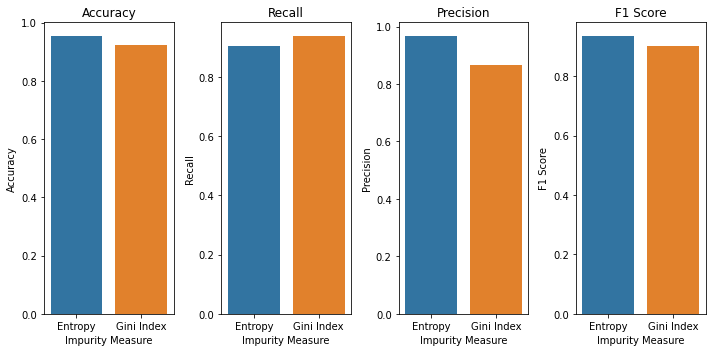

In [ ]:
fig,axes= plt.subplots(nrows=1, ncols= len(comp1.columns[1:]), figsize=(10,5))

for a,i in enumerate(comp1.columns[1:]):
    sns.barplot(data= comp1, x='Impurity Measure', y=i, ax= axes[a])
    axes[a].set_title(i)
plt.tight_layout()
plt.show()

##### From the results above we can see the entropy has higher accuracy, precision, recall, and f1 score as compared to Gini Index

## (b) Visualize the C1 and C2 by using the “graphviz” library

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Visualize C1 and C2 using graphviz
dot_data1 = export_graphviz(tree1, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
dot_data2 = export_graphviz(tree2, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)


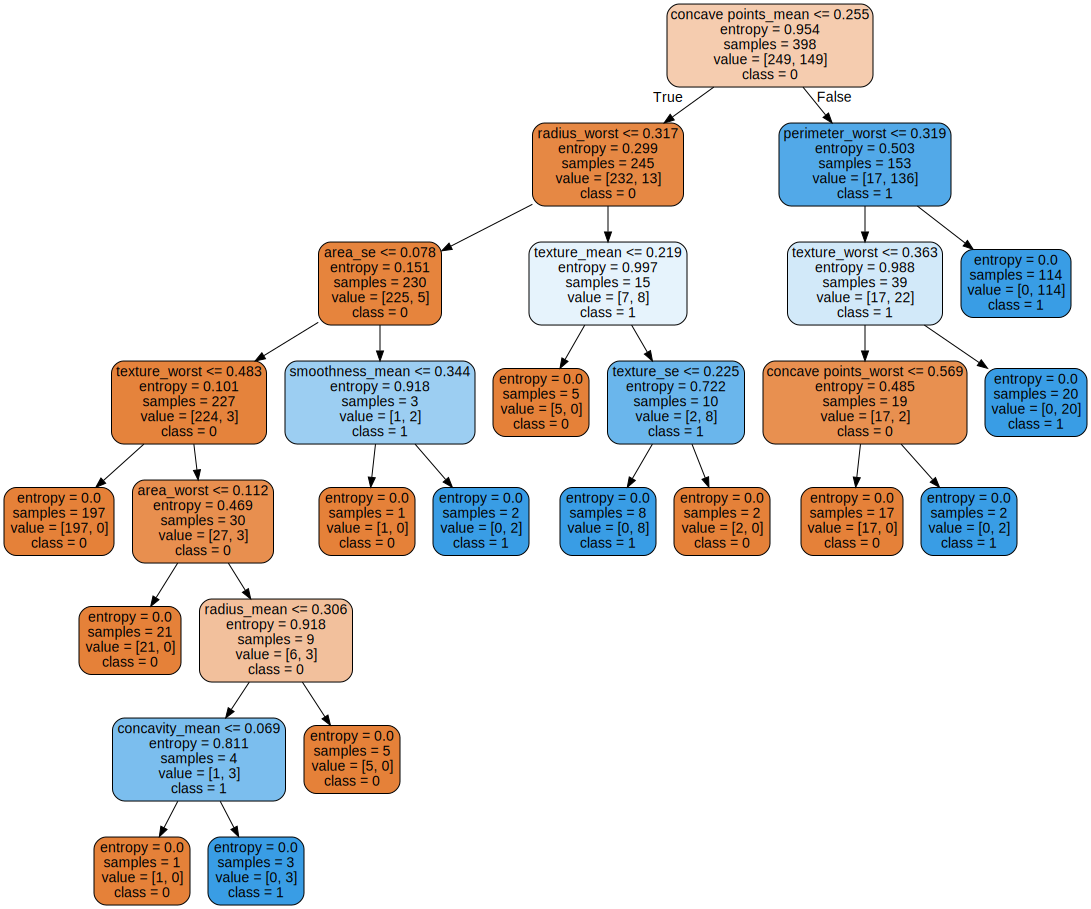

In [ ]:
display(graph1)

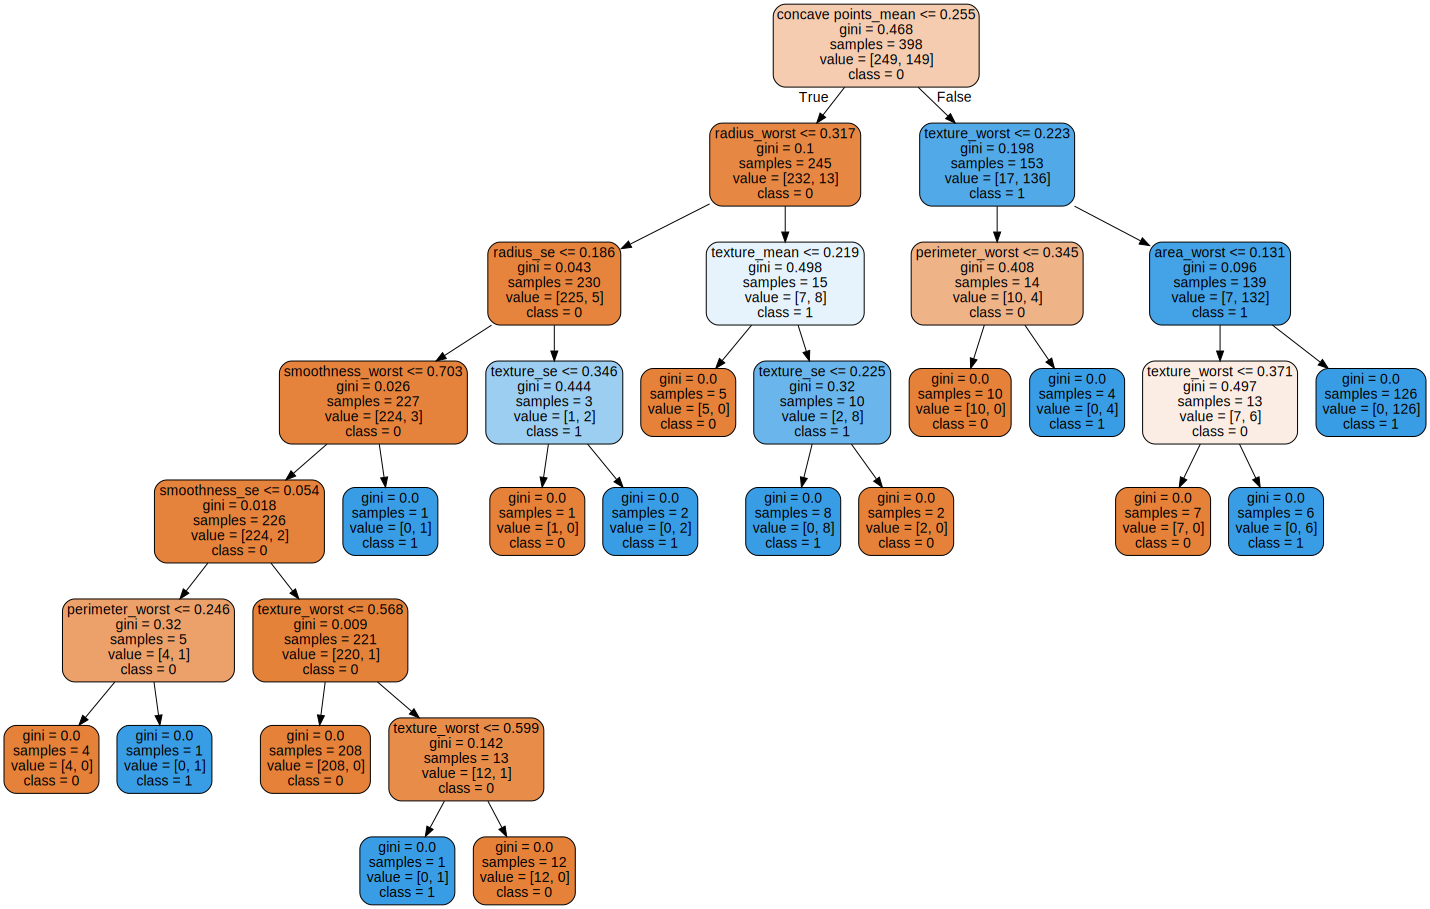

In [ ]:
display(graph2)


## (c) Prune C1 and C2 by limiting the depth

In [ ]:
# Prune C1 by limiting depth
pruned_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
pruned_tree1.fit(X_train, y_train)
print("Accuracy of pruned C1:", pruned_tree1.score(X_test, y_test))

# Prune C2 by limiting depth
pruned_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=4)
pruned_tree2.fit(X_train, y_train)
print("Accuracy of pruned C2:", pruned_tree2.score(X_test, y_test))

Accuracy of pruned C1: 0.9473684210526315
Accuracy of pruned C2: 0.9590643274853801


## Compare their performance with the unpruned versions of tree.

As we can see after pruning with the depth of 4 the the trees C1 and C2 the accuracy is almost same. Both are giving .95 accuracy. Where before pruning the accuracy of C1 is better than the C2. 

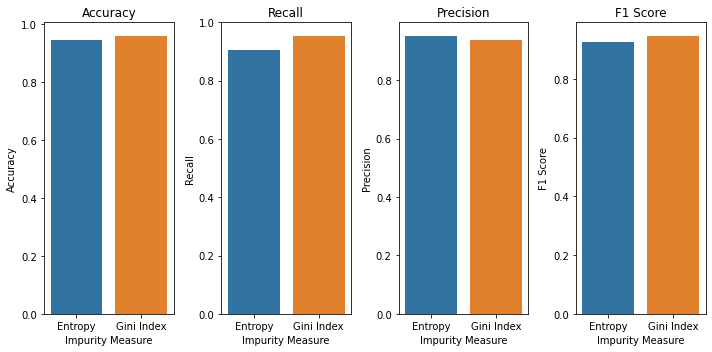

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate performance of C1 and C2 on the testing set
y_pred3 = pruned_tree1.predict(X_test)
y_pred4 = pruned_tree2.predict(X_test)

precision3 = precision_score(y_test, y_pred3)
precision4 = precision_score(y_test, y_pred4)

recall3 = recall_score(y_test, y_pred3)
recall4 = recall_score(y_test, y_pred4)

f1_score3 = f1_score(y_test, y_pred3)
f1_score4 = f1_score(y_test, y_pred4)

acc3 = accuracy_score(y_test, y_pred3)
acc4 = accuracy_score(y_test, y_pred4)

comp2 = pd.DataFrame({'Impurity Measure':["Entropy","Gini Index"],'Accuracy':[acc3, acc4], 'Recall':[recall3,recall4],'Precision':[precision3, precision4
                                                                                            ], 'F1 Score':[f1_score3, f1_score4]})
# Plot the C1 and C2 performance 
fig,axes= plt.subplots(nrows=1, ncols= len(comp2.columns[1:]), figsize=(10,5))

for a,i in enumerate(comp2.columns[1:]):
    sns.barplot(data= comp2, x='Impurity Measure', y=i, ax= axes[a])
    axes[a].set_title(i)
plt.tight_layout()
plt.show()


In [ ]:
print("Unpruned tree of C1 and C2")
comp1

Unpruned tree of C1 and C2


,Impurity Measure,Accuracy,Recall,Precision,F1 Score
0,Entropy,0.953216,0.904762,0.966102,0.934426
1,Gini Index,0.923977,0.936508,0.867647,0.900763


In [ ]:
print("Prunned Tree of C1 and C2")
comp2

Prunned Tree of C1 and C2


,Impurity Measure,Accuracy,Recall,Precision,F1 Score
0,Entropy,0.947368,0.904762,0.9500,0.926829
1,Gini Index,0.959064,0.952381,0.9375,0.944882


As we can see in plotted graph and table after pruned the tree Accuracy of C1 is greater than C2 where in Recall C1 is less than C2 and in precision C1 greater than C2 but in F1 score C1 is greater than C2. 

## (d) Use depth 1,...,20 and plot the performance for C1 and C2 separately.

In [ ]:
import matplotlib.pyplot as plt

# Prune C1 and C2 by limiting the depth and compare their performance with the unpruned versions
train_acc1 = []
test_acc1 = []
train_acc2 = []
test_acc2 = []
for depth in range(1, 21):
    # Prune C1
    pruned_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    pruned_tree1.fit(X_train, y_train)
    test_acc1.append(accuracy_score(y_test, pruned_tree1.predict(X_test)))
    # Prune C2
    pruned_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    pruned_tree2.fit(X_train, y_train)
    test_acc2.append(accuracy_score(y_test, pruned_tree2.predict(X_test)))





### Plot the accuracy of C1 on test data 

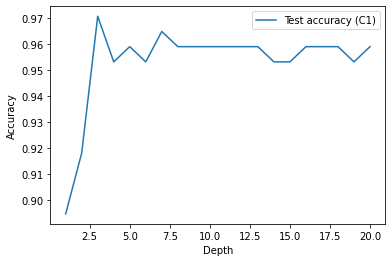

In [ ]:
plt.plot(range(1, 21), test_acc1, label='Test accuracy (C1)')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plot the accuracy of C2 on test data 

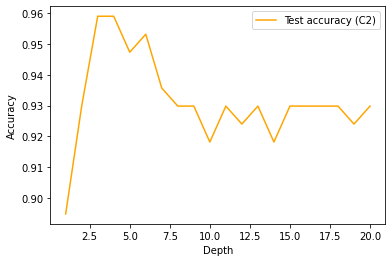

In [ ]:
plt.plot(range(1, 21), test_acc2, label='Test accuracy (C2)', color = "orange")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Compare the performance of C1 and C2 by plotting a graph

From the Line Graph we can see that:
1. For C1 Entropy based Decision Tree, accuracy is best when max depth is set 3 after that the accuracy is not increasing.
2. For C2 Gini Index based Decision Tree, accuracy is best when max depth is set at 3 but after that accuracy is gradually decreasing.

## (e) Choose the best value for depth and visualize C1 and C2.

In [ ]:
# Choose the best value for depth and visualize C1 and C2
best_depth1 = test_acc1.index(max(test_acc1)) + 1
best_depth2 = test_acc2.index(max(test_acc2)) + 1

print("best depth for C1", best_depth1)
print("best depth for C2", best_depth2)

best depth for C1 3
best depth for C2 3


In [ ]:
bestDepthC1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
bestDepthC1.fit(X_train, y_train)
print("Accuracy of pruned C1:", pruned_tree1.score(X_test, y_test))

Accuracy of pruned C1: 0.9590643274853801


In [ ]:
bestDepthC2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
bestDepthC2.fit(X_train, y_train)
print("Accuracy of pruned C2:", pruned_tree1.score(X_test, y_test))

Accuracy of pruned C2: 0.9590643274853801


In [ ]:
dot_data1 = export_graphviz(bestDepthC1, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
dot_data2 = export_graphviz(bestDepthC2, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)


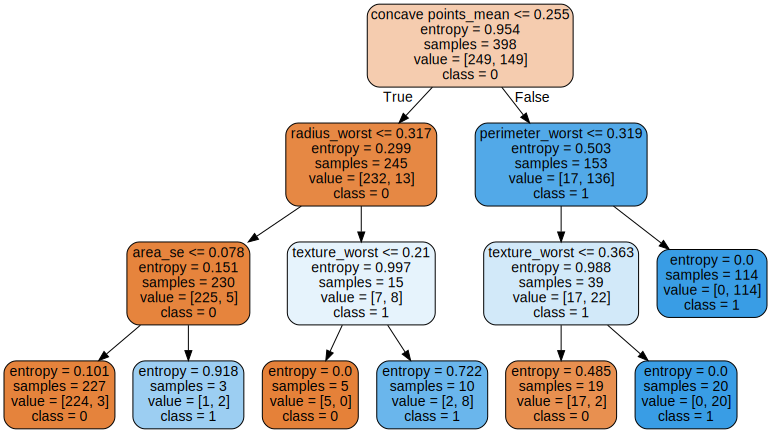

In [ ]:
display(graph1)

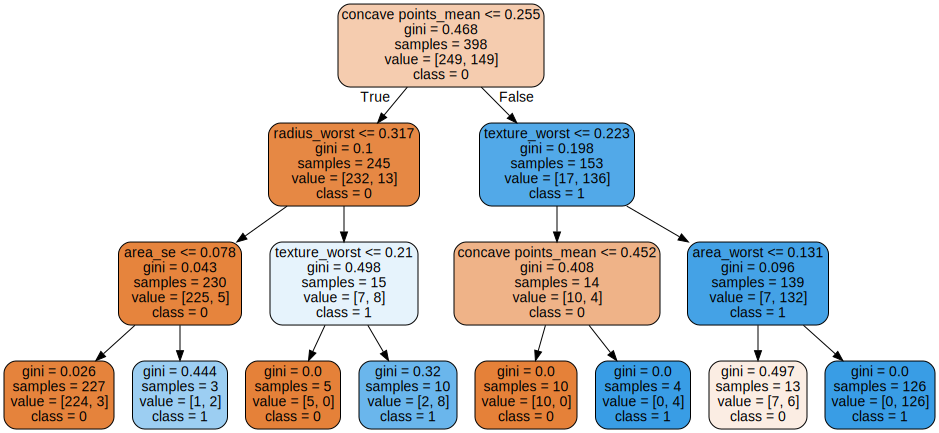

In [ ]:
display(graph2)


# 2.(a)

#### To train a Random Forest (RF) classifier with 10 estimators and compare the performance with the Decision Tree classifier(C1) trained in the previous section, we can use the RandomForestClassifier class from the sklearn.ensemble module and fit the model on the same training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier with 10 estimators
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

# Evaluate the performance on the test set
rf_score = rf.score(X_test, y_test)
print("Random Forest score: {:.3f}".format(rf_score))

Random Forest score: 0.965


### compare the performance for the test set with C1.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate performance of C1 and C2 on the testing set
y_pred5 = rf.predict(X_test)

precision1 = precision_score(y_test, y_pred5)

recall1 = recall_score(y_test, y_pred5)

f1_score1 = f1_score(y_test, y_pred5)

acc1 = accuracy_score(y_test, y_pred5)

comp3 = pd.DataFrame({'Model':["RF"],'Accuracy':[acc1], 'Recall':[recall1],'Precision':[precision1
                                                                                            ], 'F1 Score':[f1_score1]})


In [ ]:
print("C1 performance before pruning")
comp1.head(1)

C1 performance before pruning


,Impurity Measure,Accuracy,Recall,Precision,F1 Score
0,Entropy,0.953216,0.904762,0.966102,0.934426


In [ ]:
print("C1 performance after pruning")
comp2.head(1)

C1 performance after pruning


,Impurity Measure,Accuracy,Recall,Precision,F1 Score
0,Entropy,0.947368,0.904762,0.95,0.926829


In [ ]:
print("Random Forest performance")
comp3

Random Forest performance


,Model,Accuracy,Recall,Precision,F1 Score
0,RF,0.964912,0.952381,0.952381,0.952381


### The over all performance of RF with estimator = 10 is better than C1 in previous solution before or after pruning the tree as we can see in given below tables.

## (b) Change the number of estimators from 10, 50, 100, 500, 1000.

In [ ]:

# Train random forest classifiers with different numbers of estimators

n_estimators = [10, 50, 100, 500, 1000]
rf_scores = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    pred= rf.predict(X_test)
    accuracy= accuracy_score(y_test, pred)
    rf_scores.append(accuracy)

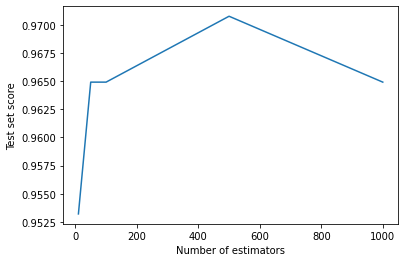

In [ ]:
# Plot the test set performance against the number of estimators

plt.plot(n_estimators, rf_scores)
plt.xlabel("Number of estimators")
plt.ylabel("Test set score")
plt.show()

Model is performing better when estimators are 500.

## (c) Perform 5 fold cross-validation and report the performance for RF classifier with 50 estimators

In [ ]:
from sklearn.model_selection import cross_val_score

# Train a random forest classifier with 50 estimators
rf = RandomForestClassifier(n_estimators=50)

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf, X_scaled, y_encoded, scoring='accuracy',  cv=5)


## Performance for RF classifier with 50 estimators

In [ ]:
# Report the mean and standard deviation of the cross-validation scores
print("Random Forest CV average accuracy score (mean): {:.3f}".format(rf_cv_scores.mean()))
print("Random Forest CV score (std): {:.3f}".format(rf_cv_scores.std()))

Random Forest CV average accuracy score (mean): 0.960
Random Forest CV score (std): 0.021


##### After performing the Random Forest with 50 estimator the mean value is .96 .

## (d) Plot the feature importance for RF with 200 estimators using the mean decrease in impurity and also feature permutation and explain the plots.

## Compute feature importance using mean decrease in impurity

[0.0273597  0.0181378  0.05236127 0.04568669 0.00599818 0.01115265
 0.05384436 0.11716226 0.00287118 0.00514496 0.01725589 0.0054498
 0.0168054  0.0348996  0.00582431 0.00335598 0.00815723 0.00393081
 0.00544476 0.00665177 0.10738715 0.01722181 0.09568608 0.09250755
 0.01038436 0.01365257 0.03078884 0.16097195 0.0175174  0.00638769]


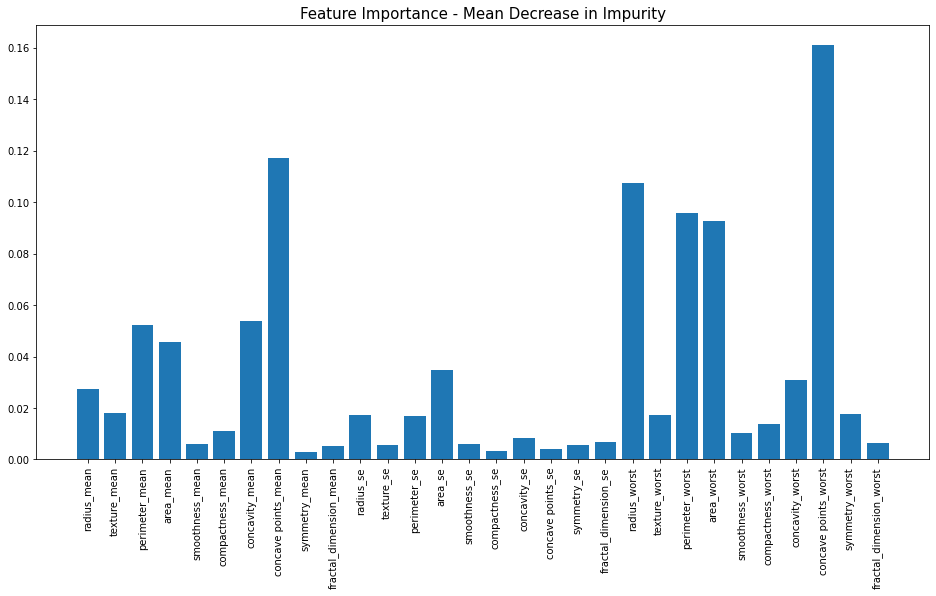

In [ ]:

# Train a random forest classifier with 200 estimators
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

# Get feature importance using mean decrease in impurity
importances = rf.feature_importances_

# Sort features by decreasing importance

print(importances)
# Create bar plot
plt.figure(figsize=(16,8))
plt.bar(range(len(df.columns[1:])), importances)
plt.xticks(range(len(df.columns[1:])), df.columns[1:], rotation=90)
plt.title('Feature Importance - Mean Decrease in Impurity', size=15)
plt.show()

## Compute feature importance using feature permutation

[ 0.          0.00233918  0.          0.00116959 -0.00233918 -0.00116959
 -0.00467836 -0.00467836  0.          0.          0.          0.
 -0.00116959  0.00233918  0.          0.          0.          0.
  0.          0.          0.00467836  0.00467836  0.00116959  0.00350877
 -0.00233918  0.         -0.00350877  0.00584795  0.          0.        ]


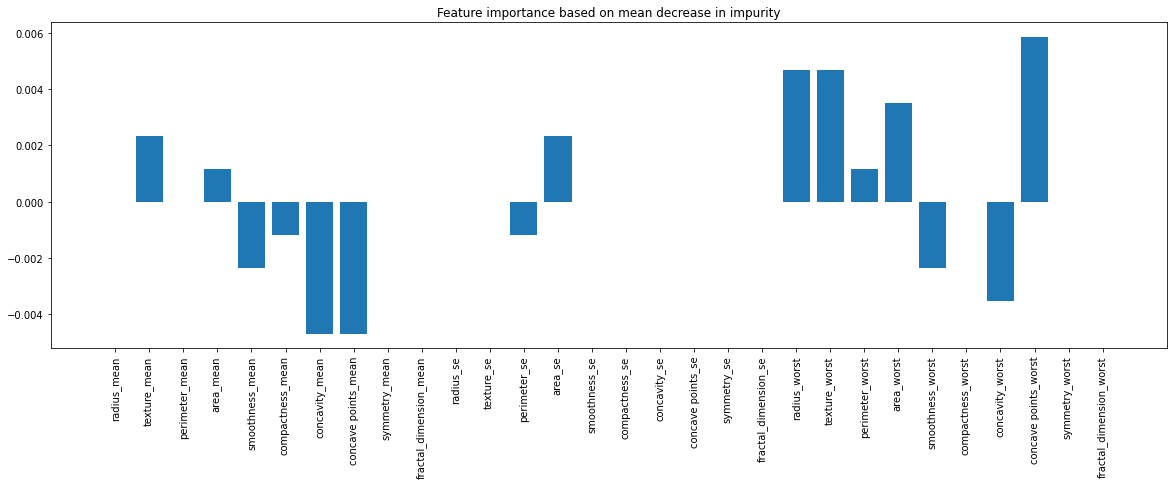

In [ ]:
from sklearn.inspection import permutation_importance

# Compute feature importance using feature permutation
result = permutation_importance(rf, X_test, y_test, random_state=42,)
importances = result.importances_mean
print(importances)
plt.figure(figsize=(20,6))
default_x_ticks = range(len(df.columns[1:]))
plt.bar(default_x_ticks, importances)
plt.xticks(default_x_ticks, df.columns[1:], rotation=90)
plt.title('Feature importance based on mean decrease in impurity', size=12)
plt.show()

## feature importance using mean decrease in impurity
### they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.  Impurity-based feature importances can be misleading for high cardinality features (many unique values). 
 
#### As given in feature importances based on mean decrease in impurity plot the top 4 imporatant feature is 
1. concave points_worst
2. concave points_mean
3. area_worst
4. perimeter_worst

## feature importance using Permutation


### Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

##### the feature importances based on permutation top 4 imporatant feature is
1. texture_worst
2. texture_mean
3. area_worst
4. radius_worst

As we can see Concave points worst and area worst feature is common in top 4 in both.


## 3(a)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming you have loaded your training and test data into X_train, y_train, X_test, and y_test arrays

# Train an AdaBoost classifier with 10 estimators
ab = AdaBoostClassifier(n_estimators=10)
ab.fit(X_train, y_train)

ab_score = ab.score(X_test, y_test)

print("ADA boost classifier score: {:.3f}".format(ab_score))
# Once trained, the classifier can be used to make predictions on new data using the predict method:
# y_pred_ab = ab.predict(X_test)



ADA boost classifier score: 0.971


## Compare the Performance with C1 and RF in 2a.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate performance of C1 and C2 on the testing set
y_pred1 = ab.predict(X_test)

precision5 = precision_score(y_test, y_pred1)

recall5 = recall_score(y_test, y_pred1)

f1_score5 = f1_score(y_test, y_pred1)

acc5 = accuracy_score(y_test, y_pred1)

comp4 = pd.DataFrame({'Model':["RF"],'Accuracy':[acc5], 'Recall':[recall5],'Precision':[precision5
                                                                                            ], 'F1 Score':[f1_score5]})

In [ ]:
comp4

,Model,Accuracy,Recall,Precision,F1 Score
0,RF,0.97076,0.952381,0.967742,0.96


### With C1 the accuracy on test data is .95 where with AdaBoost the accuracy with test data is .97 which is better performing model than C1. Where RF model in 2(a) accuracy is .96 which is also less than AdaBoost hence, we can say that AdaBoost model is best performing model so far.

## 3(b) Change the number of estimators from 10,50,100,500, 1000, and plot the performance.

In [ ]:
# Train random forest classifiers with different numbers of estimators
n_estimators = [10, 50, 100, 500, 1000]
ab_scores = []

for n in n_estimators:
    ab = AdaBoostClassifier(n_estimators=n)
    ab.fit(X_train, y_train)
    score = ab.score(X_test, y_test)
    ab_scores.append(score)

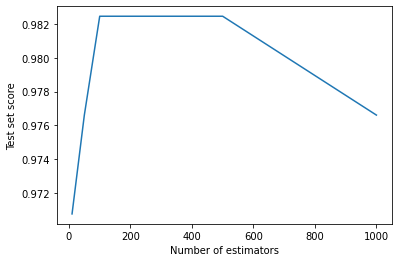

In [ ]:
# Plot the test set performance against the number of estimators
plt.plot(n_estimators, ab_scores)
plt.xlabel("Number of estimators")
plt.ylabel("Test set score")
plt.show()

As we can see in graph the performance of model is decreasing with increasing the number of estimator after 500. 

### Perform 5 fold cross-validation and report the performance for classifier with 50 estimators

In [ ]:
# Train a random forest classifier with 50 estimators
ab = AdaBoostClassifier(n_estimators=50)

# Perform 5-fold cross-validation
ab_cv_scores = cross_val_score(ab, X, y, cv=5)

# Report the mean and standard deviation of the cross-validation scores
print("AdaBoost CV score (mean): {:.3f}".format(ab_cv_scores.mean()))
print("AdaBoost CV score (std): {:.3f}".format(ab_cv_scores.std()))

AdaBoost CV score (mean): 0.970
AdaBoost CV score (std): 0.020


## 4(a) Train a classifier and compare the performance for the test set with C1 and 2a and 3a.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the performance of the Gaussian Naive Bayes classifier on the test set

# y_pred_gnb = gnb.predict(X_test)
# print("y_pred_gnb", y_pred_gnb)
# gnb_accuracy = accuracy_score(y_test, y_pred_gnb)

score = gnb.score(X_test, y_test)
print("Gaussian classifier score: {:.3f}".format(ab_score))


Gaussian classifier score: 0.971


### compare the performance for the test set with C1 and 2a and 3a.¶

In [ ]:
# Evaluate performance of C1 and C2 on the testing set
y_pred6 = gnb.predict(X_test)

precision6 = precision_score(y_test, y_pred6)

recall6 = recall_score(y_test, y_pred6)

f1_score6 = f1_score(y_test, y_pred6)

acc6 = accuracy_score(y_test, y_pred6)

comp5 = pd.DataFrame({'Model':["Gaussian"],'Accuracy':[acc6], 'Recall':[recall6],'Precision':[precision6
                                                                                            ], 'F1 Score':[f1_score6]})
comp5


,Model,Accuracy,Recall,Precision,F1 Score
0,Gaussian,0.935673,0.904762,0.919355,0.912


C1 accuracy score is .95 and Random forest accuracy is .96 where AdaBoost accuracy score is .97 whereas Gaussian model has also performed same and score is .93 which is worst performed model comparative to other.

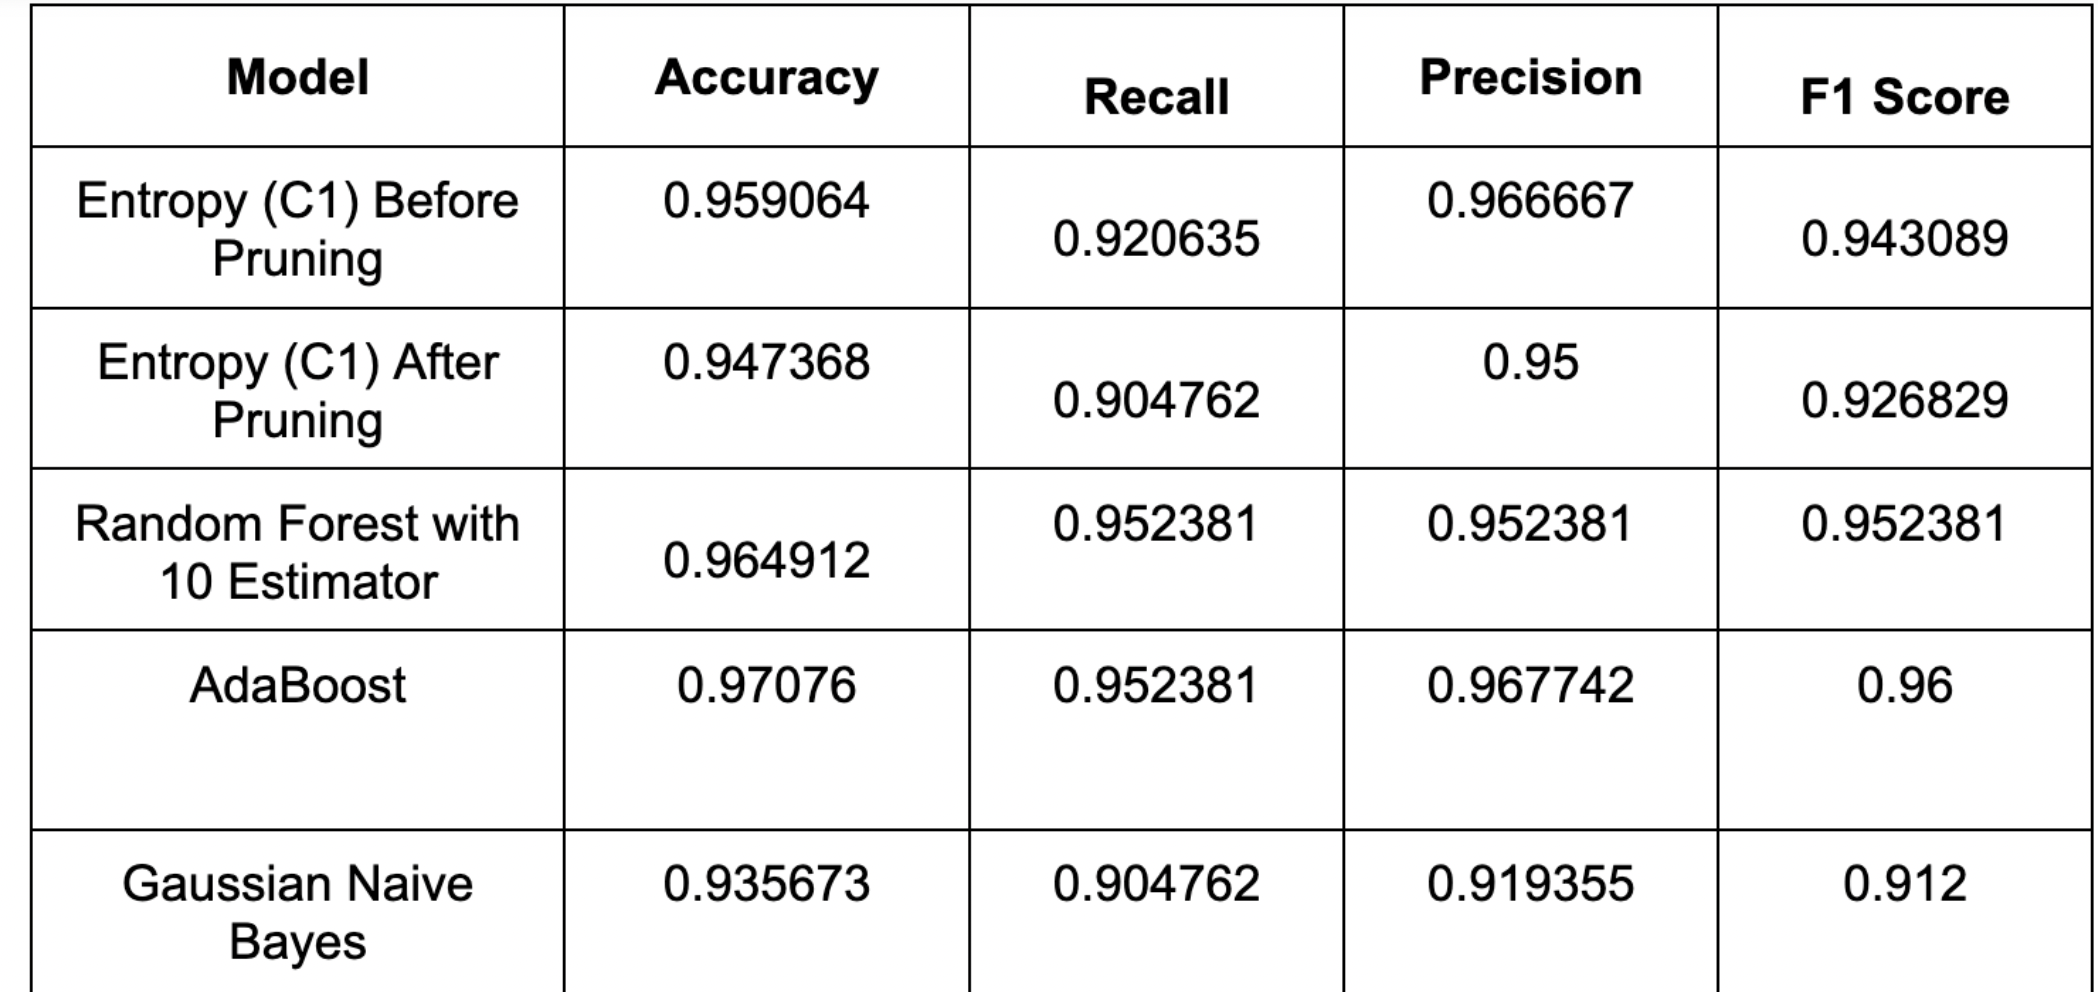

# 5(a)

In [ ]:
# Assuming you have loaded your data into the X array
from sklearn.decomposition import PCA

# Create a PCA object with the number of components equal to the number of original variables
pca = PCA(n_components=X.shape[1])

# Fit the PCA model to the data and transform the data to the principal components
pca.fit(X_scaled)

# Calculate the cumulative proportion of explained variance by the principal components
cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to account for more than 95% of the total variation
n_components = np.argmax(cumulative_proportion > 0.95) + 1

# Print the cumulative proportion of explained variance and the number of components needed to account for more than 95% of the total variation
print(f"Cumulative proportion of explained variance: {cumulative_proportion}")
print(f"Number of components needed to account for more than 95% of the total variation: {n_components}")

# Initialize a new PCA object with the number of components to keep set to n_components = 10 here
pca = PCA(n_components=n_components)

# Fit the new PCA object to the data and transform the data
X_pca = pca.fit_transform(X_scaled)

Cumulative proportion of explained variance: [0.53097689 0.70381179 0.77495621 0.8390688  0.87992952 0.91064446
 0.92645284 0.93836755 0.94825184 0.95770631 0.96620027 0.97378004
 0.98034642 0.98509453 0.98778877 0.99036631 0.99220387 0.99371658
 0.99509377 0.99615336 0.99713642 0.99792092 0.99844898 0.99895896
 0.99938904 0.99971865 0.99990923 0.99996514 0.99999404 1.        ]
Number of components needed to account for more than 95% of the total variation: 10


## 5(b)

## Train a Random Forest classifier with 100 estimators using all the features


In [ ]:

# Train a Random Forest classifier with 100 estimators using all the features
rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features:", accuracy_all)


Accuracy with all features: 0.9707602339181286


In [ ]:
# Use PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=10)

# Split the reduced data into training and testing sets
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, train_size= 0.7, test_size=0.3, random_state=42)

# Train a Random Forest classifier with 100 estimators using the reduced features
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca_train, y_train)
y_pred_pca = rf_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy with reduced features:", accuracy_pca)

Accuracy with reduced features: 0.9532163742690059


In [ ]:
# Compare the performance of the two models
print("Accuracy with all features:", accuracy_all)
print("Accuracy with reduced features:", accuracy_pca)

Accuracy with all features: 0.9707602339181286
Accuracy with reduced features: 0.9532163742690059


As we can see above the Accuracy with all feature is higher than the accuracy with PCA reduced feature 10.